# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
from acs_plotting_maps import plot_acs_hazard_1pp, regions_dict, cmap_dict, tick_dict
import xarray as xr

# Step 2 - Load and prepare hazard data
Use xarray to load hazard data.\
If this data is not a two-dimensional array, perform your desired selection or calculation (eg mean, min, max, percentile) to reduce data to 2D.

In [3]:
# load some dataset
# for example, here we load BARPA rainfall data
filename = "/g/data/ia39/ncra/ocean/GW1p5_dhw.nc"
ds = xr.open_dataset(filename)
ds


<xarray.Dataset> Size: 475MB
Dimensions:   (xt_ocean: 3600, yt_ocean: 1500, year: 20)
Coordinates:
  * xt_ocean  (xt_ocean) float64 29kB 0.05 0.15 0.25 0.35 ... 359.8 359.9 360.0
  * yt_ocean  (yt_ocean) float64 12kB -74.95 -74.85 -74.75 ... 74.75 74.85 74.95
  * year      (year) int64 160B 2015 2016 2017 2018 2019 ... 2031 2032 2033 2034
Data variables:
    dhw_amax  (year, yt_ocean, xt_ocean) float32 432MB ...
    dhw_max   (yt_ocean, xt_ocean) float32 22MB ...
    dhw_min   (yt_ocean, xt_ocean) float32 22MB ...
Attributes:
    units:    degrees C week

In [4]:
ds = ds.rename({"xt_ocean":"lon", "yt_ocean":"lat"}) 
ds = ds.assign_coords({"lon":ds.lon.round(4),
                      "lat":ds.lat.round(4)})
ds

<xarray.Dataset> Size: 475MB
Dimensions:   (year: 20, lat: 1500, lon: 3600)
Coordinates:
  * year      (year) int64 160B 2015 2016 2017 2018 2019 ... 2031 2032 2033 2034
  * lon       (lon) float64 29kB 0.05 0.15 0.25 0.35 ... 359.6 359.8 359.9 359.9
  * lat       (lat) float64 12kB -74.95 -74.85 -74.75 ... 74.75 74.85 74.95
Data variables:
    dhw_amax  (year, lat, lon) float32 432MB ...
    dhw_max   (lat, lon) float32 22MB ...
    dhw_min   (lat, lon) float32 22MB ...
Attributes:
    units:    degrees C week

# Step 3 - Plot
Use ```plot_acs_hazard``` to visualise the hazard on a map of Australia.

There are quite a few options to modify this plotting. At a minimum, you will need:
 - **data**, a 2D xarray.DataArray of your hazard
 - **regions**, use the regions_dict to access region or state boundary shape data
 - **title**, title of plot naming the index or hazard you are plotting
 - **date_range**, date range of the data you have plotted, appears as a subtitle under the title
 - **cmap**, use the cmap_dict to access a range of recommended colormaps
 - **ticks**, use the tick_dict to access a range of useful ranges or input your own list or array
 - **cbar_label**, is the label for the colorbar. Give name and unit
 - **cbar_extend**, controls the arrows of the colorbar. Indicates that values beyond the colorbar are possible. Use 'neither' for finite ranges eg deciles. Use 'both' for anomalies or temperatures. Use 'max' for total rainfall, where negative values are not possible, but very large positive values are possible. "min" is also an option.
 - **dataset_name**, name of the data source eg "AGCD v2", "BARPA-R ACCESS-CM2"
 - (**baseline**, If plotting anomalies, give the base period as a string, eg "1961-1990")

In [5]:
import cartopy.crs as ccrs


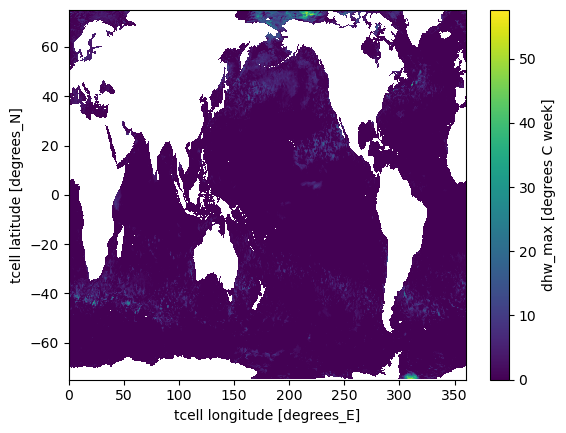

In [6]:
var = "dhw_max"
ds[var].plot()

In [7]:
import geopandas as gpd
import numpy as np
PATH = "/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data"
name = "NCRA_Marine_region"
ncra_marine = gpd.read_file(f"{PATH}/{name}/{name}.shp")


CPU times: user 5.09 s, sys: 417 ms, total: 5.51 s
Wall time: 5.51 s


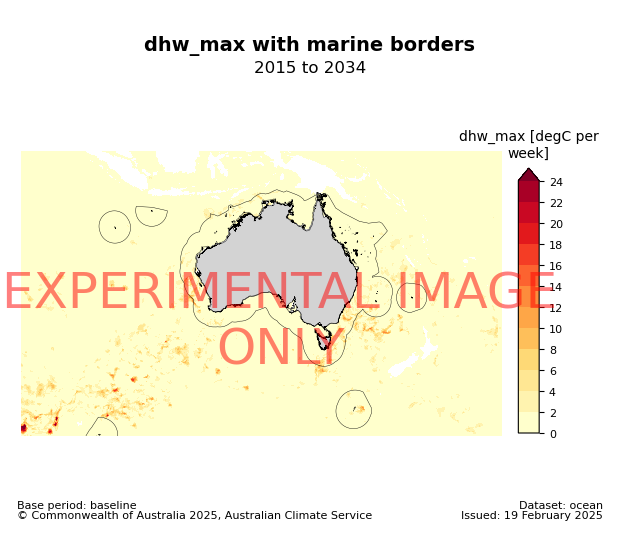

In [8]:
%%time
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs

PATH = "/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data"
name = "NCRA_Marine_region"
ncra_marine = gpd.read_file(f"{PATH}/{name}/{name}.shp")

filename = "/g/data/ia39/ncra/ocean/GW1p5_dhw.nc"
ds = xr.open_dataset(filename)
ds = ds.rename({"xt_ocean":"lon", "yt_ocean":"lat"}) 

var = "dhw_max"

plot_acs_hazard_1pp(data = ds[var],
                title = "dhw_max with marine borders",
                date_range="2015 to 2034",
                regions = ncra_marine,
                cbar_extend = "max",     
                cbar_label = "dhw_max [degC per week]",
                dataset_name = "ocean",
                baseline = "baseline",
                cmap=cmap_dict['mhw_days'],
                ticks=np.arange(0,25,2),
                mask_not_australia=False,
                mask_australia=True,
                xlim = (80,180),
                ylim = (-55,0),
                cmap_bad="none",
               savefig=False);

CPU times: user 18 s, sys: 478 ms, total: 18.5 s
Wall time: 18.5 s


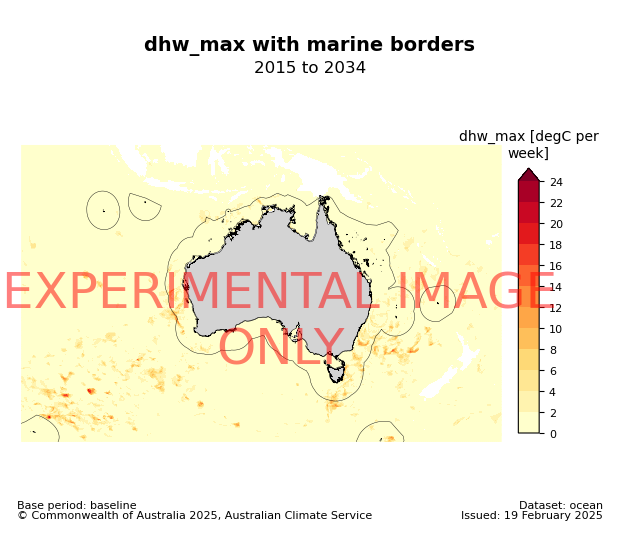

In [9]:
%%time
# changing the projection
from acs_plotting_maps import plot_acs_hazard, regions_dict, cmap_dict, tick_dict
import xarray as xr
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs

PATH = "/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data"
name = "NCRA_Marine_region"
ncra_marine = gpd.read_file(f"{PATH}/{name}/{name}.shp")

filename = "/g/data/ia39/ncra/ocean/GW1p5_dhw.nc"
ds = xr.open_dataset(filename)
ds = ds.rename({"xt_ocean":"lon", "yt_ocean":"lat"}) 

var = "dhw_max"

plot_acs_hazard_1pp(data = ds[var],
                title = "dhw_max with marine borders",
                date_range="2015 to 2034",
                regions = ncra_marine,
                cbar_extend = "max",     
                cbar_label = "dhw_max [degC per week]",
                dataset_name = "ocean",
                baseline = "baseline",
                cmap=cmap_dict['mhw_days'],
                ticks=np.arange(0,25,2),
                mask_not_australia=False,
                mask_australia=True,
                xlim = (80,180),
                ylim = (-55,0),
                cmap_bad="none",
                projection = ccrs.Robinson(central_longitude=134.0,),
               savefig=False);

## Step 4: Calculate NCRA region statistics

In [10]:
# import needed packages
from acs_area_statistics import acs_regional_stats, get_regions

name = "NCRA_Marine_region"

regions = get_regions([name])

In [11]:
mask = regions.mask_3D(ds)

In [12]:
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = mask, 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


<xarray.Dataset> Size: 520B
Dimensions:        (year: 20, region: 1)
Coordinates:
  * year           (year) int64 160B 2015 2016 2017 2018 ... 2031 2032 2033 2034
  * region         (region) int64 8B 0
    abbrevs        (region) <U2 8B '10'
    names          (region) <U6 24B 'Marine'
Data variables:
    dhw_amax_mean  (year, region) float64 160B 0.002675 0.003015 ... 0.03232
    dhw_amax_min   (year, region) float32 80B 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dhw_amax_max   (year, region) float32 80B 1.425 3.061 1.719 ... 6.901 11.17
Attributes:
    units:    degrees C week

# Access the docstring for more info

In [13]:
plot_acs_hazard?

Signature:
plot_acs_hazard(
    name='ncra_regions',
    regions=None,
    data=None,
    station_df=None,
    markersize=None,
    stippling=None,
    shading=None,
    mask_not_australia=True,
    mask_australia=False,
    agcd_mask=False,
    facecolor='none',
    edgecolor='black',
    figsize=(6, 4.5),
    title='',
    date_range='',
    projection=None,
    area_linewidth=0.3,
    coastlines=False,
    xlim=(114, 154),
    ylim=(-43.5, -7.5),
    cmap=<matplotlib.colors.LinearSegmentedColormap object at 0x14ec1e1c30d0>,
    cmap_bad='lightgrey',
    cbar_extend='both',
    ticks=None,
    tick_interval=1,
    tick_labels=None,
    cbar_label='',
    baseline=None,
    dataset_name=None,
    issued_date=None,
    contourf=False,
    contour=False,
    select_area=None,
    land_shadow=False,
    watermark='EXPERIMENTAL\nIMAGE ONLY',
    watermark_color='r',
    infile=None,
    outfile=None,
    savefig=True,
    tick_rotation=None,
    vcentre=None,
)
Docstring:
This function ta

In [14]:
acs_regional_stats?

Signature:
acs_regional_stats(
    ds=None,
    infile=None,
    var=None,
    mask=None,
    regions=None,
    dims=None,
    how=None,
    outfile=None,
    select_abbr=None,
    select_name=None,
    overlap_threshold=None,
    bins=None,
    bin_labels=None,
    chunks=None,
)
Docstring:
This function takes an Xarray dataset (ds) with variable (var)
and multiple dimensions (eg time, lat, and lon),
then selects the time range between two years (start and end),
and applies regions.mask_3D_frac_approx fractional mask (frac)
to compute a regional statistic (how, eg "mean") over two or three dimensions.
Best used with numerical data without nans.

Parameters
----------
ds: xr.Dataset or xr.DataArray
    expects an xr.Dataset with variable var and dimensions time, lat, and lon.

infile: str
    NetCDF file to read in as xr.Dataset

var: str
    name of variable in ds, eg "pr" or "tas".
    If None, then tries to infer the var name from the data

mask:  xarray.DataArray 'mask' or ["fracti